In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Substitua o 'caminho_do_arquivo.csv' pelo caminho real do seu arquivo CSV
arquivo_csv = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'

# Ler o arquivo CSV
dados = pd.read_csv(arquivo_csv)

# Mostrar as primeiras linhas do DataFrame
print(dados.head())


                                                text  Toxic  \
0  Meu nivel de amizade com isis é ela ter meu in...    1.0   
1  rt @user @user o cara adultera dados, que fora...    1.0   
2  @user @user @user o cara só é simplesmente o m...    1.0   
3  eu to chorando vei vsf e eu nem staneio izone ...    1.0   
4  tem um do jack com a msm música e agr não sei ...    0.0   

                                          clean_text  
0  Meu nivel de amizade com isis é ela ter meu in...  
1  rt @user @user o cara adultera dados, que fora...  
2  @user @user @user o cara só é simplesmente o m...  
3  eu to chorando vei vsf e eu nem staneio izone ...  
4  tem um do jack com a msm música e agr não sei ...  


In [ ]:
# Selecionar colunas específicas
dados_brutos = dados.iloc[:, 0]
rotulos = dados.iloc[:, 1]
dados_preprocessados = dados.iloc[:, 2]

# Mostrar as primeiras linhas de cada coluna
print("Dados brutos:")
print(dados_brutos.head())
print("\nRótulos:")
print(rotulos.head())
print("\nDados preprocessados:")
print(dados_preprocessados.head())


Dados brutos:
0    Meu nivel de amizade com isis é ela ter meu in...
1    rt @user @user o cara adultera dados, que fora...
2    @user @user @user o cara só é simplesmente o m...
3    eu to chorando vei vsf e eu nem staneio izone ...
4    tem um do jack com a msm música e agr não sei ...
Name: text, dtype: object

Rótulos:
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Toxic, dtype: float64

Dados preprocessados:
0    Meu nivel de amizade com isis é ela ter meu in...
1    rt @user @user o cara adultera dados, que fora...
2    @user @user @user o cara só é simplesmente o m...
3    eu to chorando vei vsf e eu nem staneio izone ...
4    tem um do jack com a msm música e agr não sei ...
Name: clean_text, dtype: object


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 280, 16)           1600000   
                                                                 
 flatten_3 (Flatten)         (None, 4480)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                143392    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,743,425
Trainable params: 1,743,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
417/417 - 11s - loss: 0.6613 - accuracy: 0.6058 - val_loss: 0.5914 - val_accuracy: 0.6952 - 11s/epoch - 26ms/step
Epoch 2/5
417/417 - 10s - loss: 0.4753 - accuracy: 0

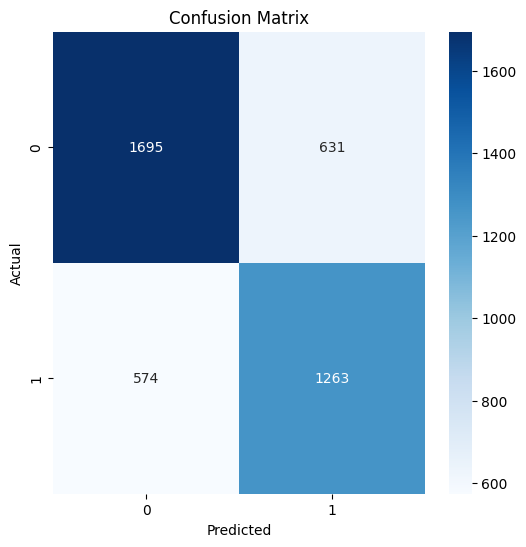

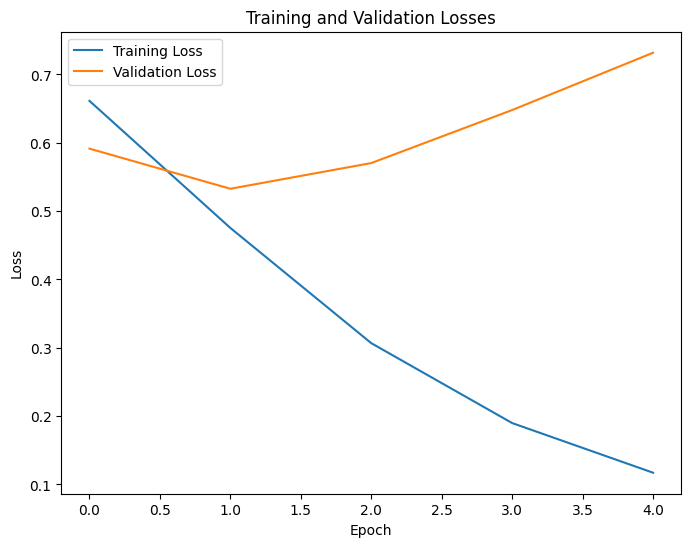

In [ ]:
# Avalia com modelo simples
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Fixar sementes para garantir a reproducibilidade dos resultados
np.random.seed(95)
tf.random.set_seed(95)

# Substitua o 'caminho_do_arquivo_treino.csv' pelo caminho real do seu arquivo CSV de treino
arquivo_csv_treino = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'
dados_treino = pd.read_csv(arquivo_csv_treino)

# Pré-processamento dos dados de treino
X = dados_treino.iloc[:, 2]  # Coluna dos dados preprocessados
y = dados_treino.iloc[:, 1]  # Coluna dos rótulos

# Codificação dos rótulos para 0 e 1
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Tokenização e sequenciamento dos textos
max_length = 280  # Define o tamanho máximo das sequências
vocab_size = 100000  # Define o tamanho do vocabulário

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Dividir os dados em conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Definir o modelo
embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Treinar o modelo
epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=2)

# Avaliar o modelo nos dados de teste
arquivo_csv_teste = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/test_toldbr.csv'  # Substitua pelo caminho real do seu arquivo CSV de teste
dados_teste = pd.read_csv(arquivo_csv_teste)
X_test = dados_teste.iloc[:, 2]  # Coluna dos dados preprocessados
y_test = dados_teste.iloc[:, 1]  # Coluna dos rótulos
y_test = encoder.transform(y_test)

# Tokenização e sequenciamento dos textos de teste
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post')

# Avaliação do modelo nos dados de teste
loss, accuracy = model.evaluate(padded_sequences_test, y_test, verbose=2)
print(f"Perda nos dados de teste: {loss:.4f}")
print(f"Acurácia nos dados de teste: {accuracy:.4f}")

# Previsões do modelo
y_pred = (model.predict(padded_sequences_test) > 0.5).astype("int32")

# Gerando o relatório de classificação
report = classification_report(y_test, y_pred, target_names=encoder.classes_, output_dict=True)

print("Classificação Report:")
for label, metrics in report.items():
    if label == 'accuracy':
        continue
    print(f"Class: {label}")
    print(f"\tPrecision: {metrics['precision']}")
    print(f"\tRecall: {metrics['recall']}")
    print(f"\tF1-score: {metrics['f1-score']}")
print(f"Macro Avg: {report['macro avg']}")
print(f"Weighted Avg: {report['weighted avg']}")

# Plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotando as curvas de loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Conta palavras no datasets de TESTE

In [ ]:
import csv

def contar_palavras(arquivo_csv):
    numero_de_palavras = 0

    with open(arquivo_csv, 'r', encoding="utf-8") as arquivo:
        leitor = csv.reader(arquivo, delimiter=',')  # assumindo que a vírgula é o delimitador

        for linha in leitor:
            for campo in linha:
                numero_de_palavras += len(campo.split())

    return numero_de_palavras

arquivo_csv = '/content/drive/MyDrive/Colab Notebooks/2023/BRACIS_toxic/data/test_toldbr.csv'
total = contar_palavras(arquivo_csv)
print(f"O arquivo contém {total} palavras.")


O arquivo contém 134099 palavras.
